In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
# Importamso los datos y creamos eldata frame

df = pd.read_csv('BBDD_Hospitalización.csv', encoding='ISO-8859-1')


<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       EDA      .  <BR>     

</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

<div style="color: #CBE364; font-size:24px">
Remplazar valores 'Not a Number' (nan) por el string 'sin dato'<br> <br>
</div>

<div style="color: #CBE364; font-size:14px">
Como podemos observar en la exploracion el dataframe tiene algunos valores NaN. Una opcion seria deszacernos de esas <br>
filas con valores 'nan' pero por tratarce de un datagrafeme pequeno remplazaremos los valores por 'sin dato'


</div>

In [4]:
df['PSA'].describe()

count    564.000000
mean      13.271401
std       15.668966
min        0.600000
25%        5.600000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

<div style="color: #CBE364; font-size:24px">
CRITERIO PARA VALORES 'NAN' <br> <br>
</div>

<div style="color: #CBE364; font-size:14px">
Los valores del antigeno prostatico especifico 'PSA' es el pricipal sujeto de estudio en el modelo.<br> 
Por tal motivo eliminare las filas de la columna que tengan valores NaN ya que la relacion principal con los <br>
otros valores no se encuentra.

</div>

In [5]:
exepto_PSA = df.columns.difference(['PSA'])
df[exepto_PSA] = df[exepto_PSA].fillna('sin dato')


In [6]:
df = df.dropna() #Eliminamos las filas de con valores nan. 

In [7]:
print(df.shape)

(564, 20)


In [8]:
#Verificamos nuevamente el dataframe para encontrar valores 'nan'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       564 non-null    int64  
 1   DIABETES                                                                   564 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 564 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           564 non-null    object 
 5   VOLUMEN PROSTATICO                                                         564 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

In [9]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,63.939716,13.271401,12.996454,0.161348,0.014184
std,9.270166,15.668966,3.916081,0.953927,0.197167
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [10]:
# Exploramos los valores unicos en las columnas categoricas para encontrar algun error. 
# columnas categoricas valores unicos (cc_vu)

cc1_vu = df['DIABETES'].value_counts()
cc2_vu = df['HOSPITALIZACIÓN ULTIMO MES'].value_counts()
cc3_vu = df['BIOPSIAS PREVIAS'].value_counts()
cc4_vu = df['VOLUMEN PROSTATICO'].value_counts()
cc5_vu = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()
cc6_vu = df['CUP'].value_counts()
cc7_vu = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()
cc77_vu = df['BIOPSIA'].value_counts()
cc8_vu = df['FIEBRE'].value_counts()
cc9_vu = df['ITU'].value_counts()
cc10_vu = df['TIPO DE CULTIVO'].value_counts()
cc11_vu = df['AGENTE AISLADO'].value_counts()
cc12_vu = df['PATRON DE RESISTENCIA'].value_counts()
cc13_vu = df['HOSPITALIZACION'].value_counts()



print(cc1_vu, cc2_vu, cc3_vu, cc4_vu, cc5_vu, cc6_vu, cc7_vu, cc77_vu, cc8_vu, cc9_vu, cc10_vu, cc11_vu, cc12_vu, cc13_vu)

DIABETES
NO    501
SI     63
Name: count, dtype: int64 HOSPITALIZACIÓN ULTIMO MES
NO    559
SI      5
Name: count, dtype: int64 BIOPSIAS PREVIAS
NO          507
SI           55
sin dato      2
Name: count, dtype: int64 VOLUMEN PROSTATICO
SI          406
NO          157
sin dato      1
Name: count, dtype: int64 ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    444
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
FLUOROQUINOLONA_AMINOGLICÓSIDO      4
Name: count, dtype: int64 CUP
NO          559
SI            4
sin dato      1
Name: count, dtype: int64 ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          542
SI           12
SI, EPOC      4
SI, ASMA      4
sin dato      2
Name: count, dtype: int64 BIOPSIA
NEG                                           320
ADENOCARCINOMA GLEASON 7                      106
ADENOCARCINOMA GLEASON 6                       38
ADENOCARCINOMA GLEASON 8                       21
ADENOC

<div style="color: #CBE364; font-size:24px">
NORMALIZACION VALORES CATEGORICOS
</div>

<div style="color: #CBE364; font-size:14px">
En 2 columnas se nesecita normalizar los valores categoricos: <br> <br>
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  :   <br>
ENF. CRONICA PULMONAR OBSTRUCTIVA  :  <br>


</div>

In [11]:
df.loc[df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].str.startswith('FLUO'), 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = 'FLUOROQUINOLONA_AMINOGLICOSIDO'

df.loc[df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].str.startswith('S'), 'ENF. CRONICA PULMONAR OBSTRUCTIVA'] = 'SI'

df.loc[df['BIOPSIA'].str.startswith('ADENOCARCINOMA GLEASON 6'), 'BIOPSIA'] = 'ADENOCARCINOMA GLEASON 6'
df.loc[df['BIOPSIA'].str.startswith('ADENOCARCINOMA GLEASON 7'), 'BIOPSIA'] = 'ADENOCARCINOMA GLEASON 7'


In [12]:
#Se verifica el cambio
cc5_vu = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()
cc7_vu = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()
cc77_vu = df['BIOPSIA'].value_counts()

#El resultado se imprime.

print(cc5_vu, cc7_vu,cc77_vu)

ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    448
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
Name: count, dtype: int64 ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          542
SI           20
sin dato      2
Name: count, dtype: int64 BIOPSIA
NEG                                           320
ADENOCARCINOMA GLEASON 7                      116
ADENOCARCINOMA GLEASON 6                       54
ADENOCARCINOMA GLEASON 8                       21
ADENOCARCINOMA GLEASON 9                       20
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         13
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64


In [13]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
565,69,NO,NO,4.43,sin dato,sin dato,FLUOROQUINOLONA_AMINOGLICOSIDO,20,sin dato,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,sin dato,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,sin dato,NO,NO,0,0


<div style="color: #CBE364; font-size:24px">
NORMALIZACION VALORES DISCRETOS<br> <br>
</div>

<div style="color: #CBE364; font-size:14px">
Revisar los valores discretos y cambiandoles el tipo al adecuado.


</div>

In [14]:
columnas_a_moficar = {"EDAD":"uint8", 'NUMERO DE MUESTRAS TOMADAS':'uint8', 
                      'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'uint8', 
                      'DIAS HOSPITALIZACION MQ':'uint8', 'DIAS HOSPITALIZACIÓN UPC':'uint8'}

df = df.astype(columnas_a_moficar)

print(df.dtypes)

ValueError: invalid literal for int() with base 10: 'NO': Error while type casting for column 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'

In [15]:
# La columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
#Muestra que tiene un valor del tipo string = 'NO' y no un integral. se remplazara por '0'

df.loc[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].str.startswith('NO'), 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = 0

In [16]:
#volvemos a correr el codigo:
columnas_a_moficar = {"EDAD":"uint8", 'NUMERO DE MUESTRAS TOMADAS':'uint8', 
                      'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'uint8', 
                      'DIAS HOSPITALIZACION MQ':'uint8', 'DIAS HOSPITALIZACIÓN UPC':'uint8'}

df = df.astype(columnas_a_moficar)

print(df.dtypes)

EDAD                                                                           uint8
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                     uint8
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       Outlayers       .       

</div>

In [17]:
#Creo una copia del dataframe limpio para revisar los OUTLAYERS.
df1 =df.copy()

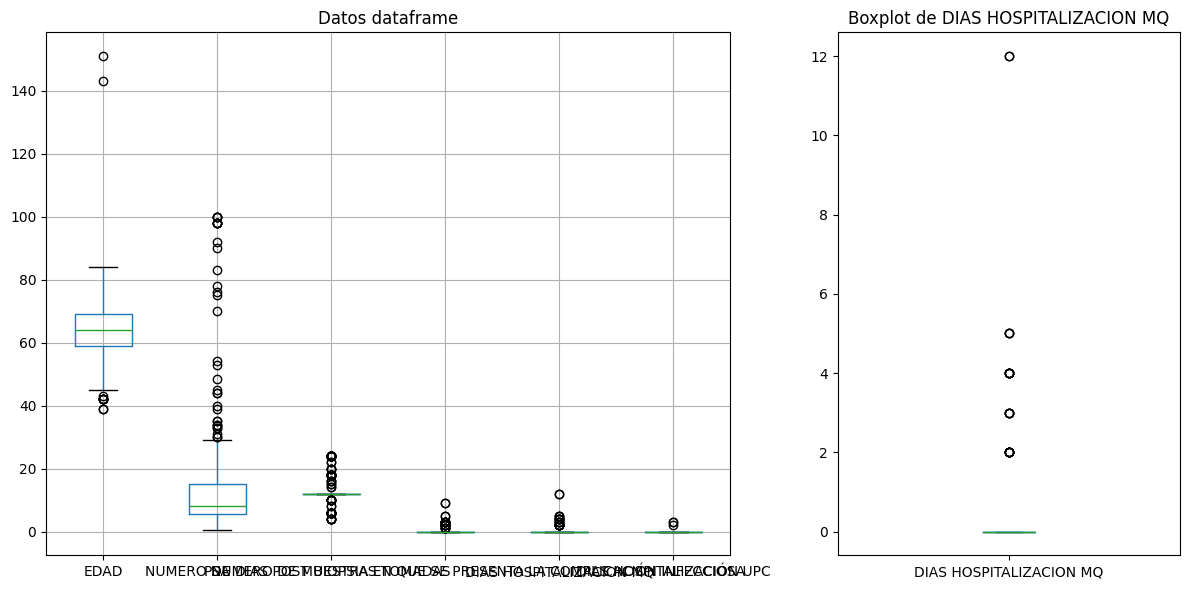

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios':[2,1]})


df1.boxplot(ax=axs[0])
df1['DIAS HOSPITALIZACION MQ'].plot(kind='box', ax=axs[1])


#titulos
axs[0].set_title('Datos dataframe')

axs[1].set_title('Boxplot de DIAS HOSPITALIZACION MQ')



plt.tight_layout()
plt.show()

<div style="color: #CBE364; font-size:24px">
CRITERIO OUTLAYERS<br> <br>
</div>

<div style="color: #CBE364; font-size:14px">
Columna 'EDAD' :  Se puede ver que hay 2 valores que sobrepasan la barrear de los 140 anios. Sopecho que es un error de <br>. Digitacion. Por tal motivo eliminare el 1 en ambos valores para dejarlos en 40 anios. <br> <br>
Columna Dias de Hospitalizacion: Eliminare las filas que tienen mas de 5 dias de Hospitalizacion ya que estos pasientes <br> estarian indicando una complicacion mas severa.


</div>

In [19]:
df1['EDAD']= df1['EDAD'].replace(151,51)
df1['EDAD']= df1['EDAD'].replace(143,43)

In [20]:
df1['NUMERO DE MUESTRAS TOMADAS'].value_counts()

NUMERO DE MUESTRAS TOMADAS
12    431
24     42
18     35
6      25
10     10
4       6
20      4
16      3
8       2
15      2
22      2
14      2
Name: count, dtype: int64

In [21]:
df1.shape

(564, 20)

In [22]:
df1 = df1[ (df1['NUMERO DE MUESTRAS TOMADAS'] <= 18) & # El numero de muestras tomadas igual o menor que 18
                                                   
                           (df1['DIAS HOSPITALIZACION MQ'] < 6) # Que sea menor a 6 dias hospitalizados 
                           ]
df1.shape

(514, 20)

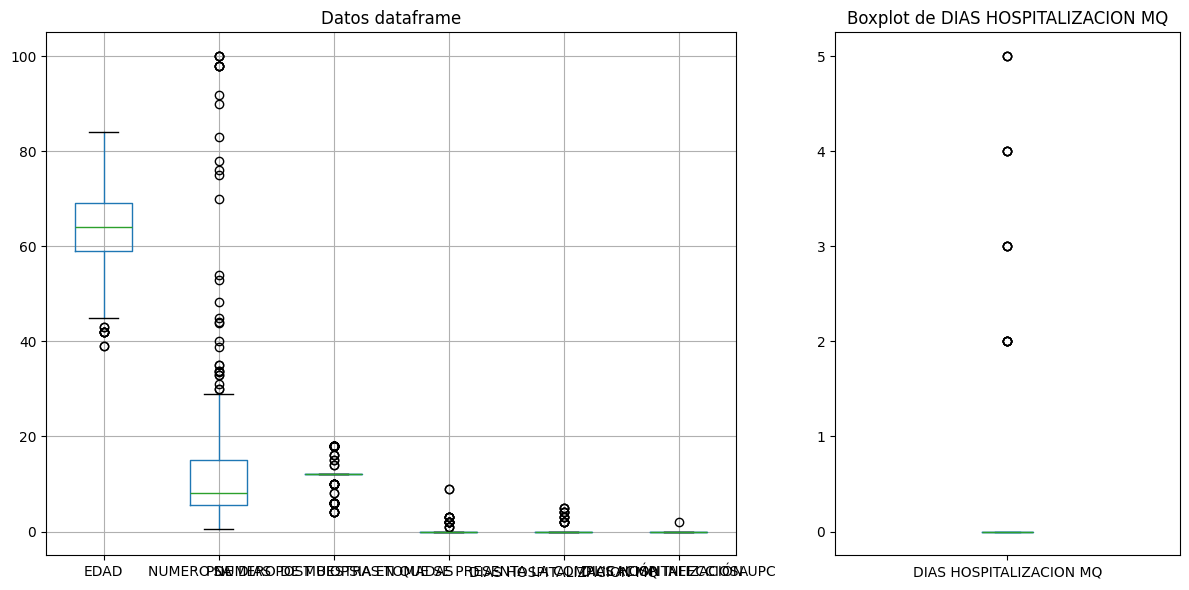

In [23]:
# Verificamos los OUTLAYERS
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios':[2,1]})


df1.boxplot(ax=axs[0])
df1['DIAS HOSPITALIZACION MQ'].plot(kind='box', ax=axs[1])


#titulos
axs[0].set_title('Datos dataframe')

axs[1].set_title('Boxplot de DIAS HOSPITALIZACION MQ')



plt.tight_layout()
plt.show()

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       TRANSFORMACIONES       .  <BR>   
.       INTERVALOS      .   <br>  

</div>


<div style="color: #CBE364; font-size:24px">
CRITERIO TRASNFORMACIONES INTERVALOS
</div>

<div style="color: #CBE364; font-size:14px">
Para reducir la complejidad del modelo agrupare las siguientes columnas en intervalos  <br>

En la columna de EDAD:  Fijamos los siguientes rangos: 0-29,30-49, 50+  <br>
En la columna PSA (ANTIGENO PROSTATICO) rangos: 0-9, 10-29, 30+. <br>

</div>

In [24]:
# Copiamos nuestro dataframe para hacer las transformaciones.
df2 = df1.copy()

In [26]:
# Creamos las primeras columas con las clasificaciones para 'EDAD'
intervalos_edad = [0,30,50, 60, 70,float('inf')]
etiquetas_edad = ['Edad 0-29', 'Edad 30-49', 'Edad 50-59' , 'Edad 60-69','70+']
df2['RANGO EDAD'] = pd.cut(df2['EDAD'], bins=intervalos_edad, labels=etiquetas_edad, right=False)

In [195]:
# Analizo cuales son los valores mas comunes para crear la clasificacion EN EL ANTIGENO PROSTATICO PSA.
# df2['PSA'].value_counts()

In [27]:
# Creamos las primeras columas con las clasificaciones para 'PSA'   <Eliminamos la clasificacion 
# ya que en la matriz de relaciones ignorabas algunos valores.


intervalos_PSA = [0,6,7,8,9,10, float('inf')]
etiquetas_PSA = ['PSA 0-5.99','PSA 6-6.99','PSA 7-7.99','PSA 8-8.99','PSA 9-9.99','PSA 10+']
df2['RANGO PSA'] = pd.cut(df2['PSA'], bins=intervalos_PSA, labels=etiquetas_PSA, right=False)

In [28]:
# Despues de haber creado las columnas con los rangos de clasificacion procedo a eliminar las columnas.
df2 = df2.drop(['EDAD', 'PSA'], axis=1)

In [29]:
#Salvamos el dataframe en un csv para poder trabajar las transformaciones las columnas categoricas a discretas.
df2.to_csv('Clean_Hospitalization.csv', index=False)

<div style="text-align: center; color: yellowgreen; font-size:32px; padding:20px ">
.       TRANSFORMACIONES       .  <BR>   
.       CATEGORICAS --> DISCRETAS     .   <br>  

</div>